In [1]:
# import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset
dataset=pd.read_csv("D:\Self\Data Science\Linear Regression\Assignment\delivery_time.csv")

In [3]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

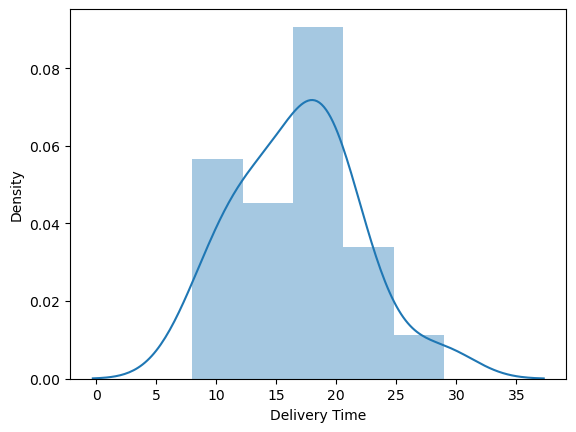

In [5]:
sns.distplot(dataset['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

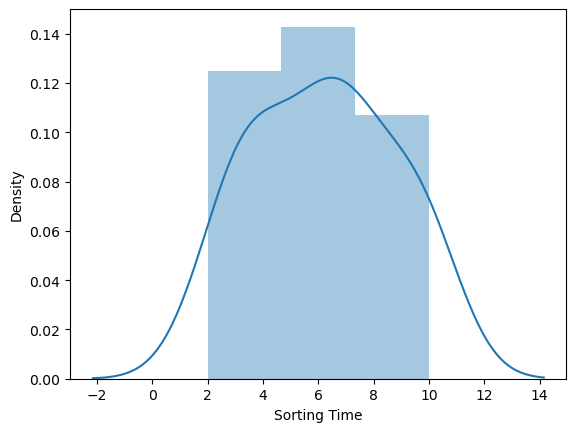

In [6]:
sns.distplot(dataset['Sorting Time'])

In [7]:
dataset.shape

(21, 2)

In [8]:
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [9]:
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

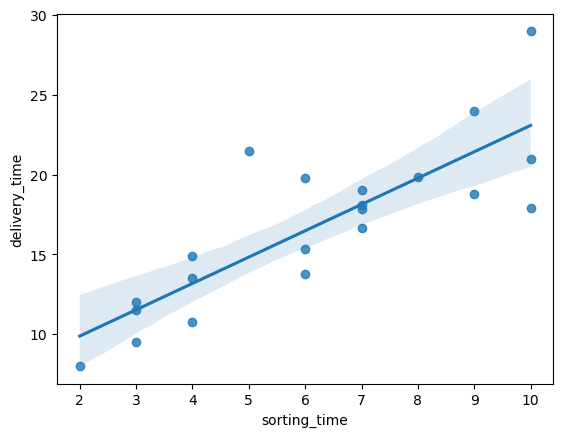

In [11]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [12]:
#model building
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [13]:
#model testing
# finding coefficient parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
# finding p-valus & t-values
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [15]:
#finding Rsquared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [16]:
model.predict(dataset)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:38:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2=smf.ols("delivery_time~np.log(sorting_time)",data=dataset).fit()

In [20]:
#model testing
# finding coefficient parameter
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [21]:
# finding p-valus & t-values
model2.tvalues , model2.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [22]:
#finding Rsquared values
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [23]:
model2.predict(dataset)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64